In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler


import pickle

In [2]:
df = pd.read_csv('../data/raw_recording.csv')
df

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4
0,2491.0,1219.0,0,0,0,0
1,2491.0,1219.0,551,86,24,14
2,2489.0,1217.0,120,86,24,19
3,2488.0,1216.0,120,86,24,25
4,2484.0,1214.0,120,85,24,26
...,...,...,...,...,...,...
85060,2235.0,643.0,115,60,18,35
85061,2234.0,643.0,115,60,18,36
85062,2234.0,643.0,115,60,17,36
85063,2233.0,642.0,114,60,17,35


In [3]:
df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()
df.dropna(inplace=True)

In [4]:
for i in range(1,50):

    df[f'channel_1_{i}'] = df['channel_1'].shift(i)
    df[f'channel_2_{i}'] = df['channel_2'].shift(i)
    df[f'channel_3_{i}'] = df['channel_3'].shift(i)
    df[f'channel_4_{i}'] = df['channel_4'].shift(i)
#     df[f'x_pos_-{i}'] = df['x_pos'].shift(i)
#     df[f'y_pos_-{i}'] = df['y_pos'].shift(i)
#     df[f'x_diff_-{i}'] = df['x_diff'].shift(i)
#     df[f'y_diff_-{i}'] = df['y_diff'].shift(i)

In [5]:
df.dropna(inplace=True)

In [6]:
X = df.drop(columns=['x_pos', 'y_pos', 'x_diff', 'y_diff'])
y = list(df['x_diff'])

W = X
z = list(df['y_diff'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state = 42)

In [8]:
lr_x = LinearRegression()
lr_x.fit(X_train, y_train)

lr_y = LinearRegression()
lr_y.fit(W_train, z_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lr_x.score(X_train, y_train), lr_x.score(X_test, y_test)

(0.007690420392094111, -0.012852007925783004)

In [10]:
lr_y.score(W_train, z_train), lr_y.score(W_test, z_test)

(0.005596682912886175, -0.03681677122816218)

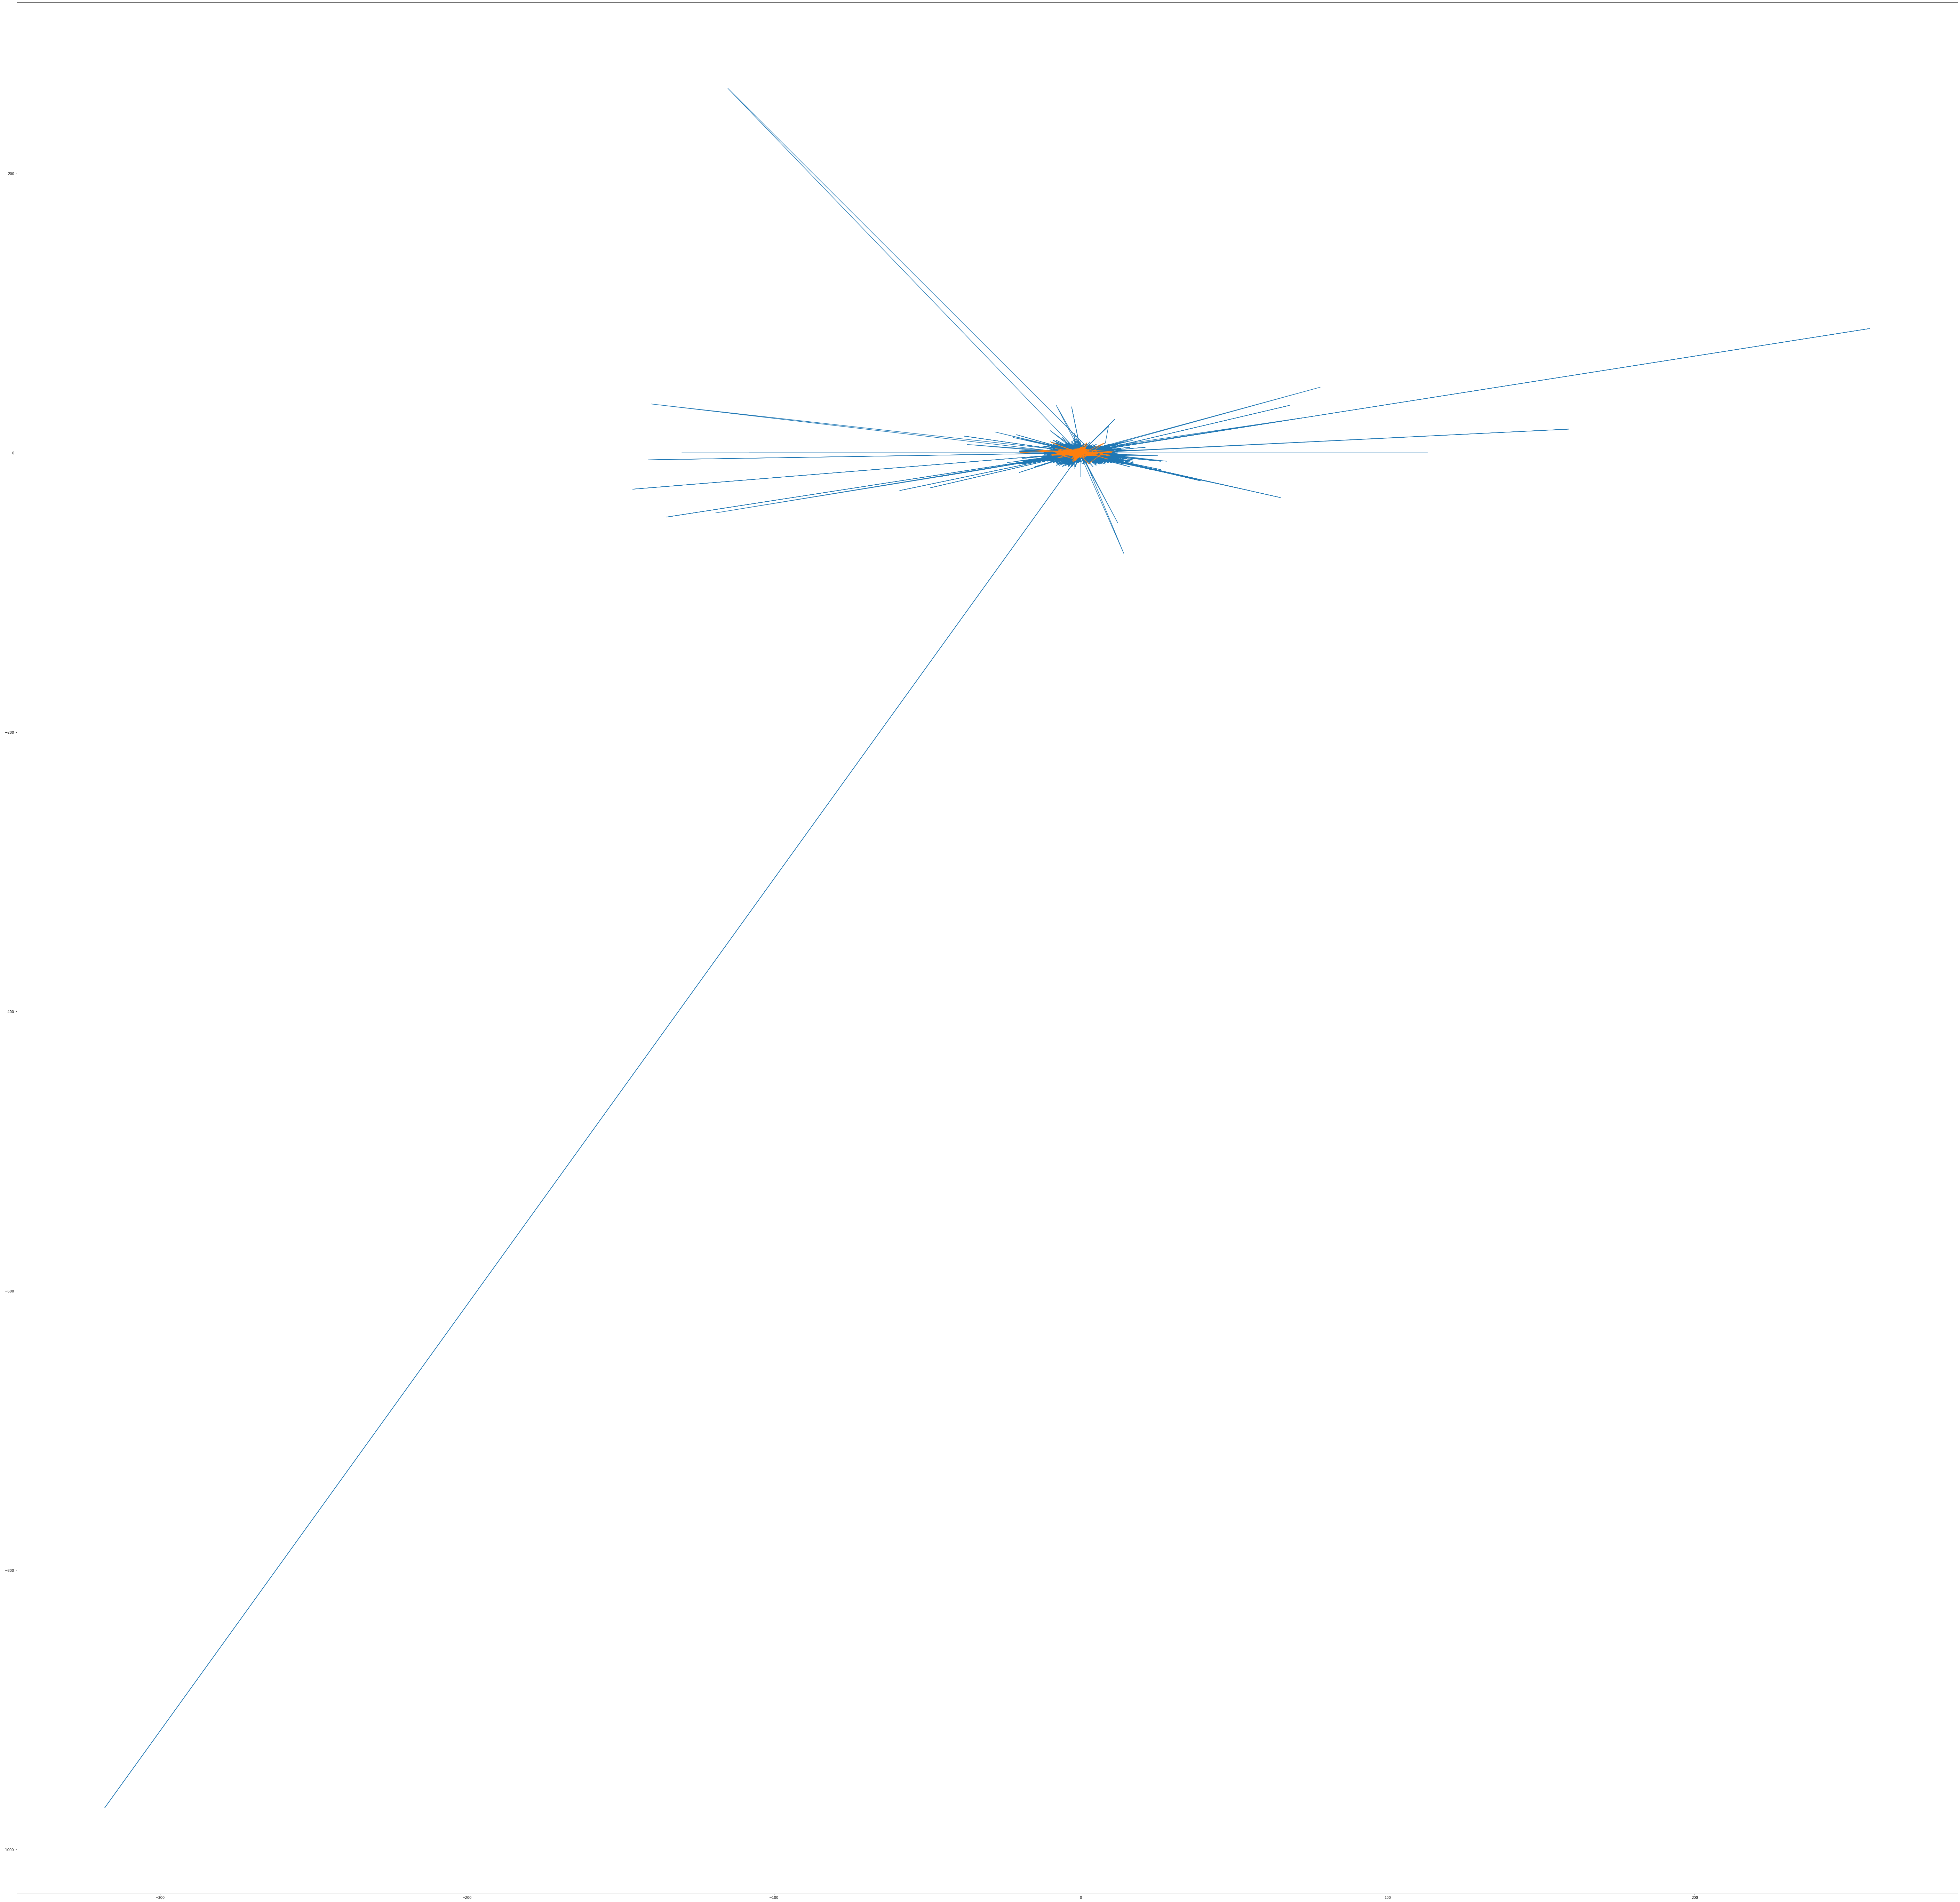

In [11]:
plt.figure(figsize=(100,100))
plt.plot(y, z);
plt.plot(lr_x.predict(X), lr_y.predict(W));


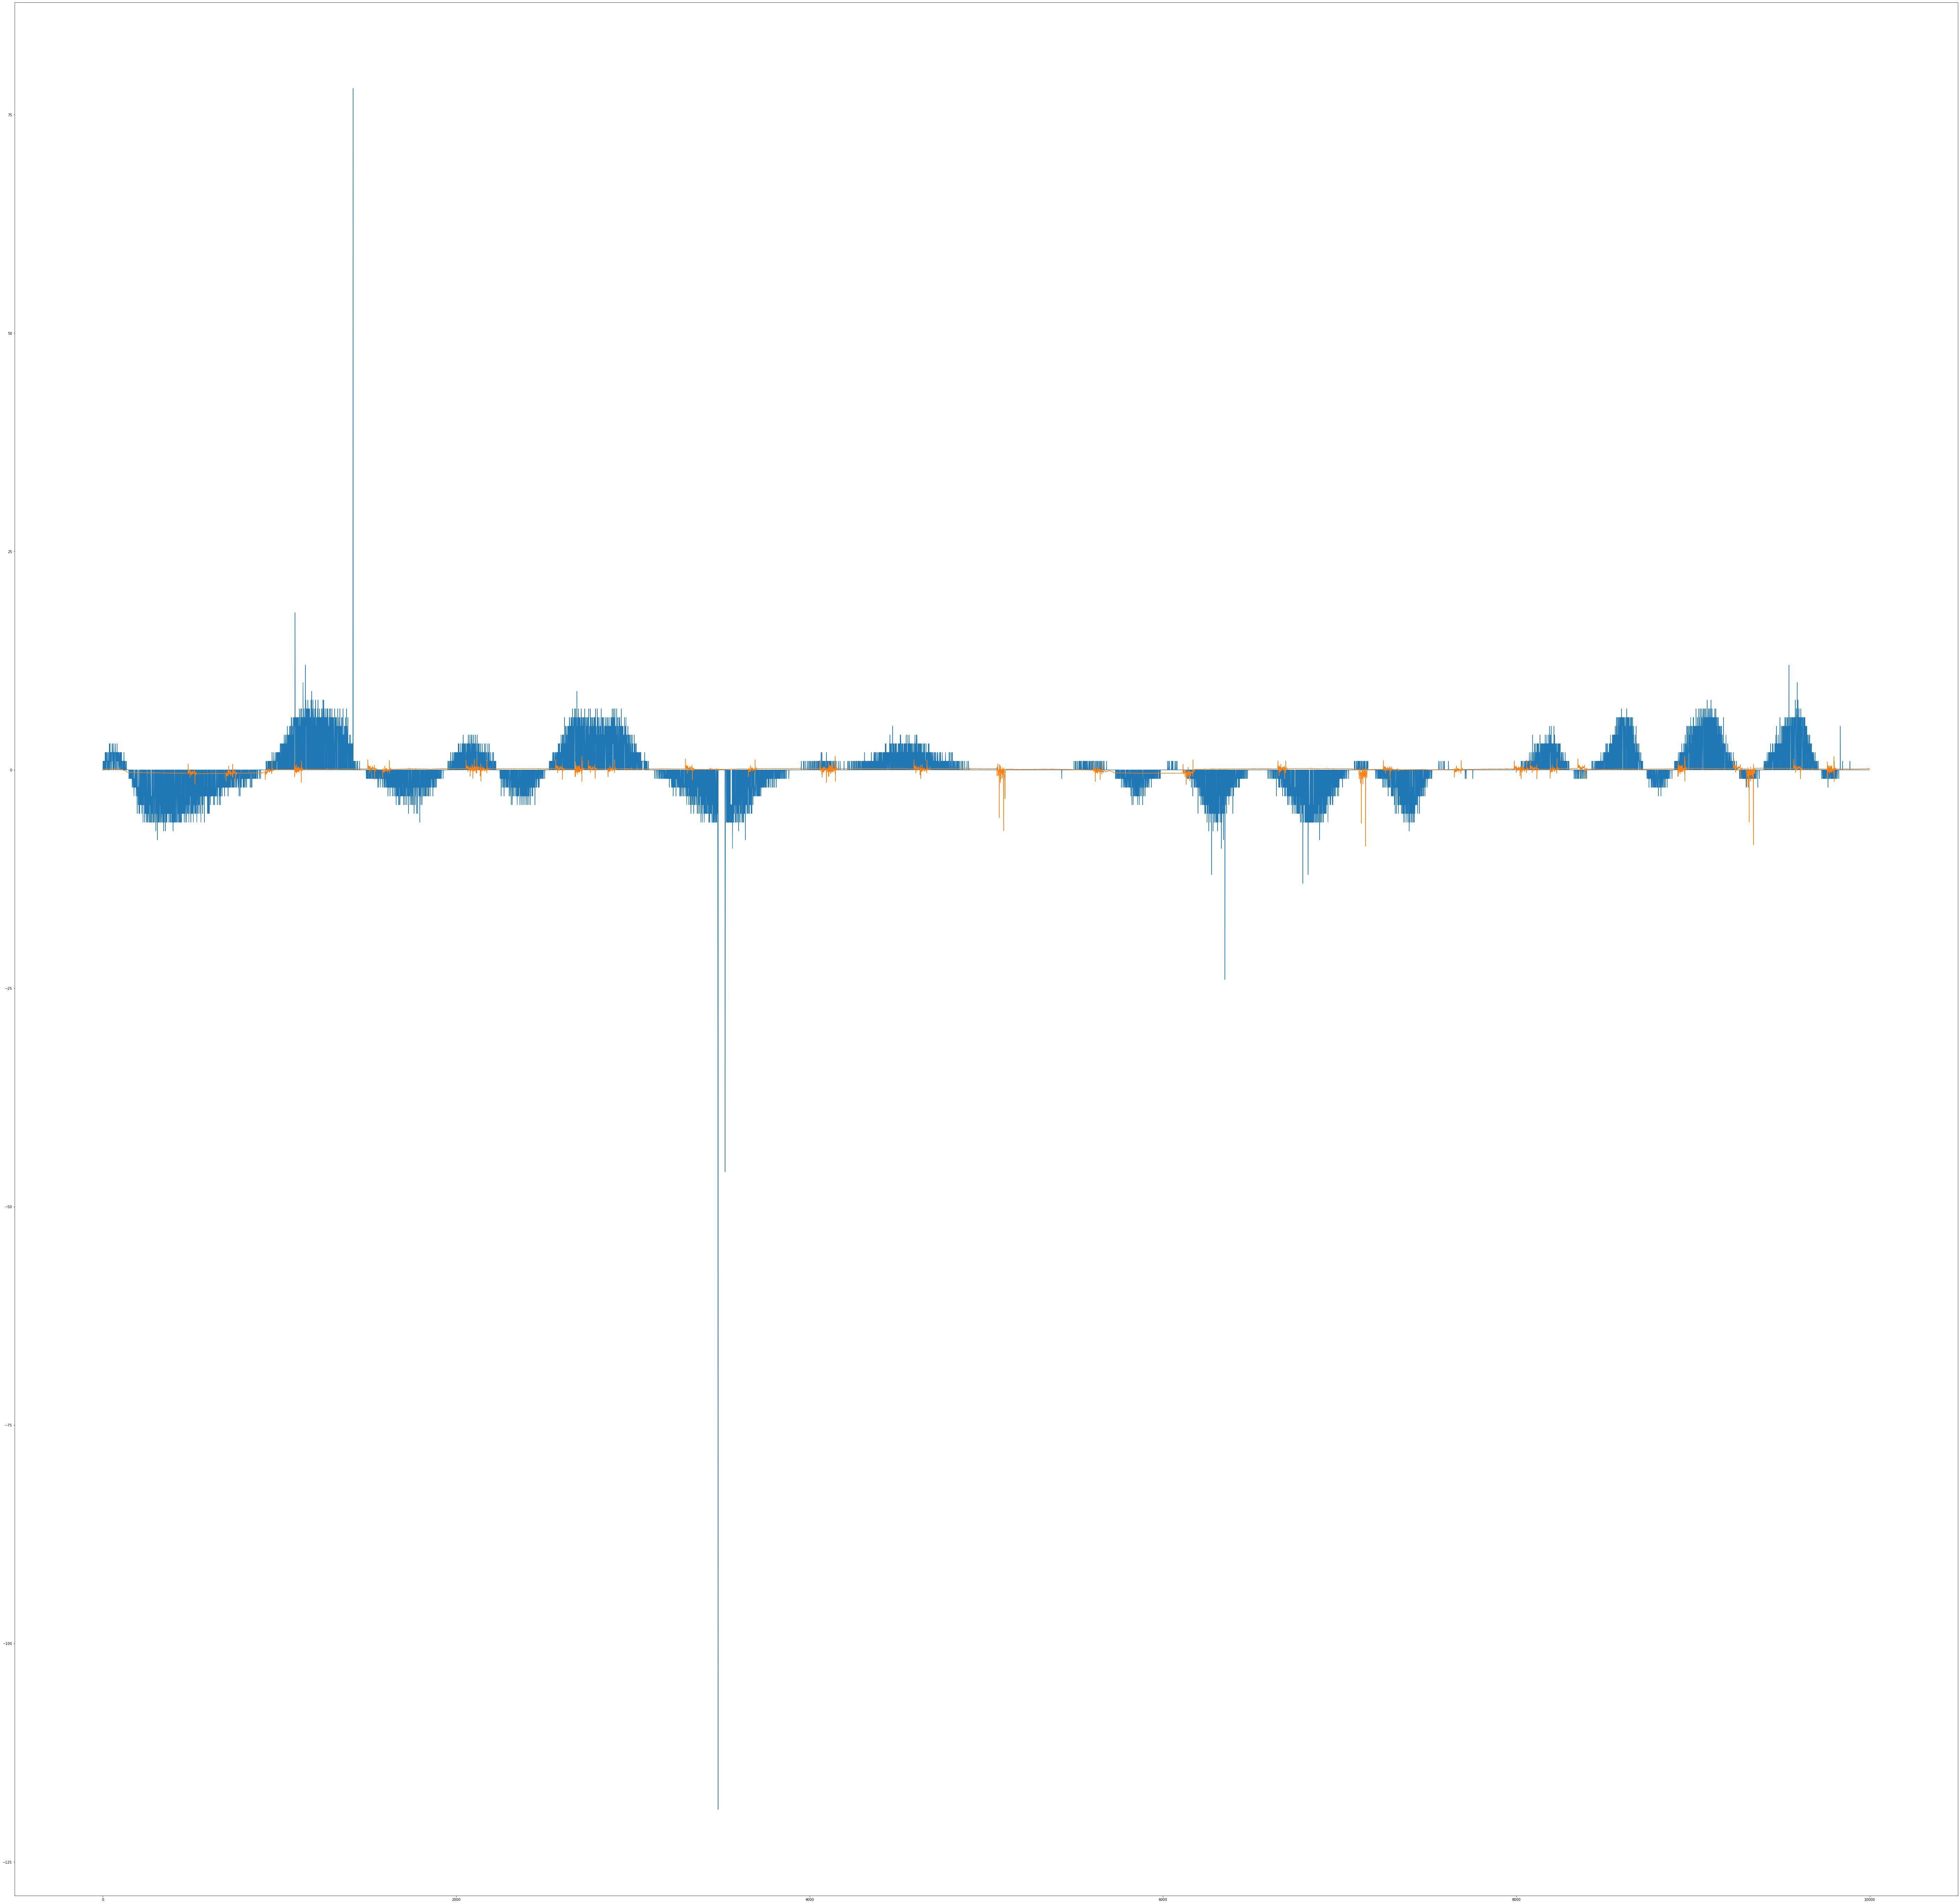

In [12]:
plt.figure(figsize=(100,100))
plt.plot(y[:10000]);
plt.plot(lr_x.predict(X)[:10000]);


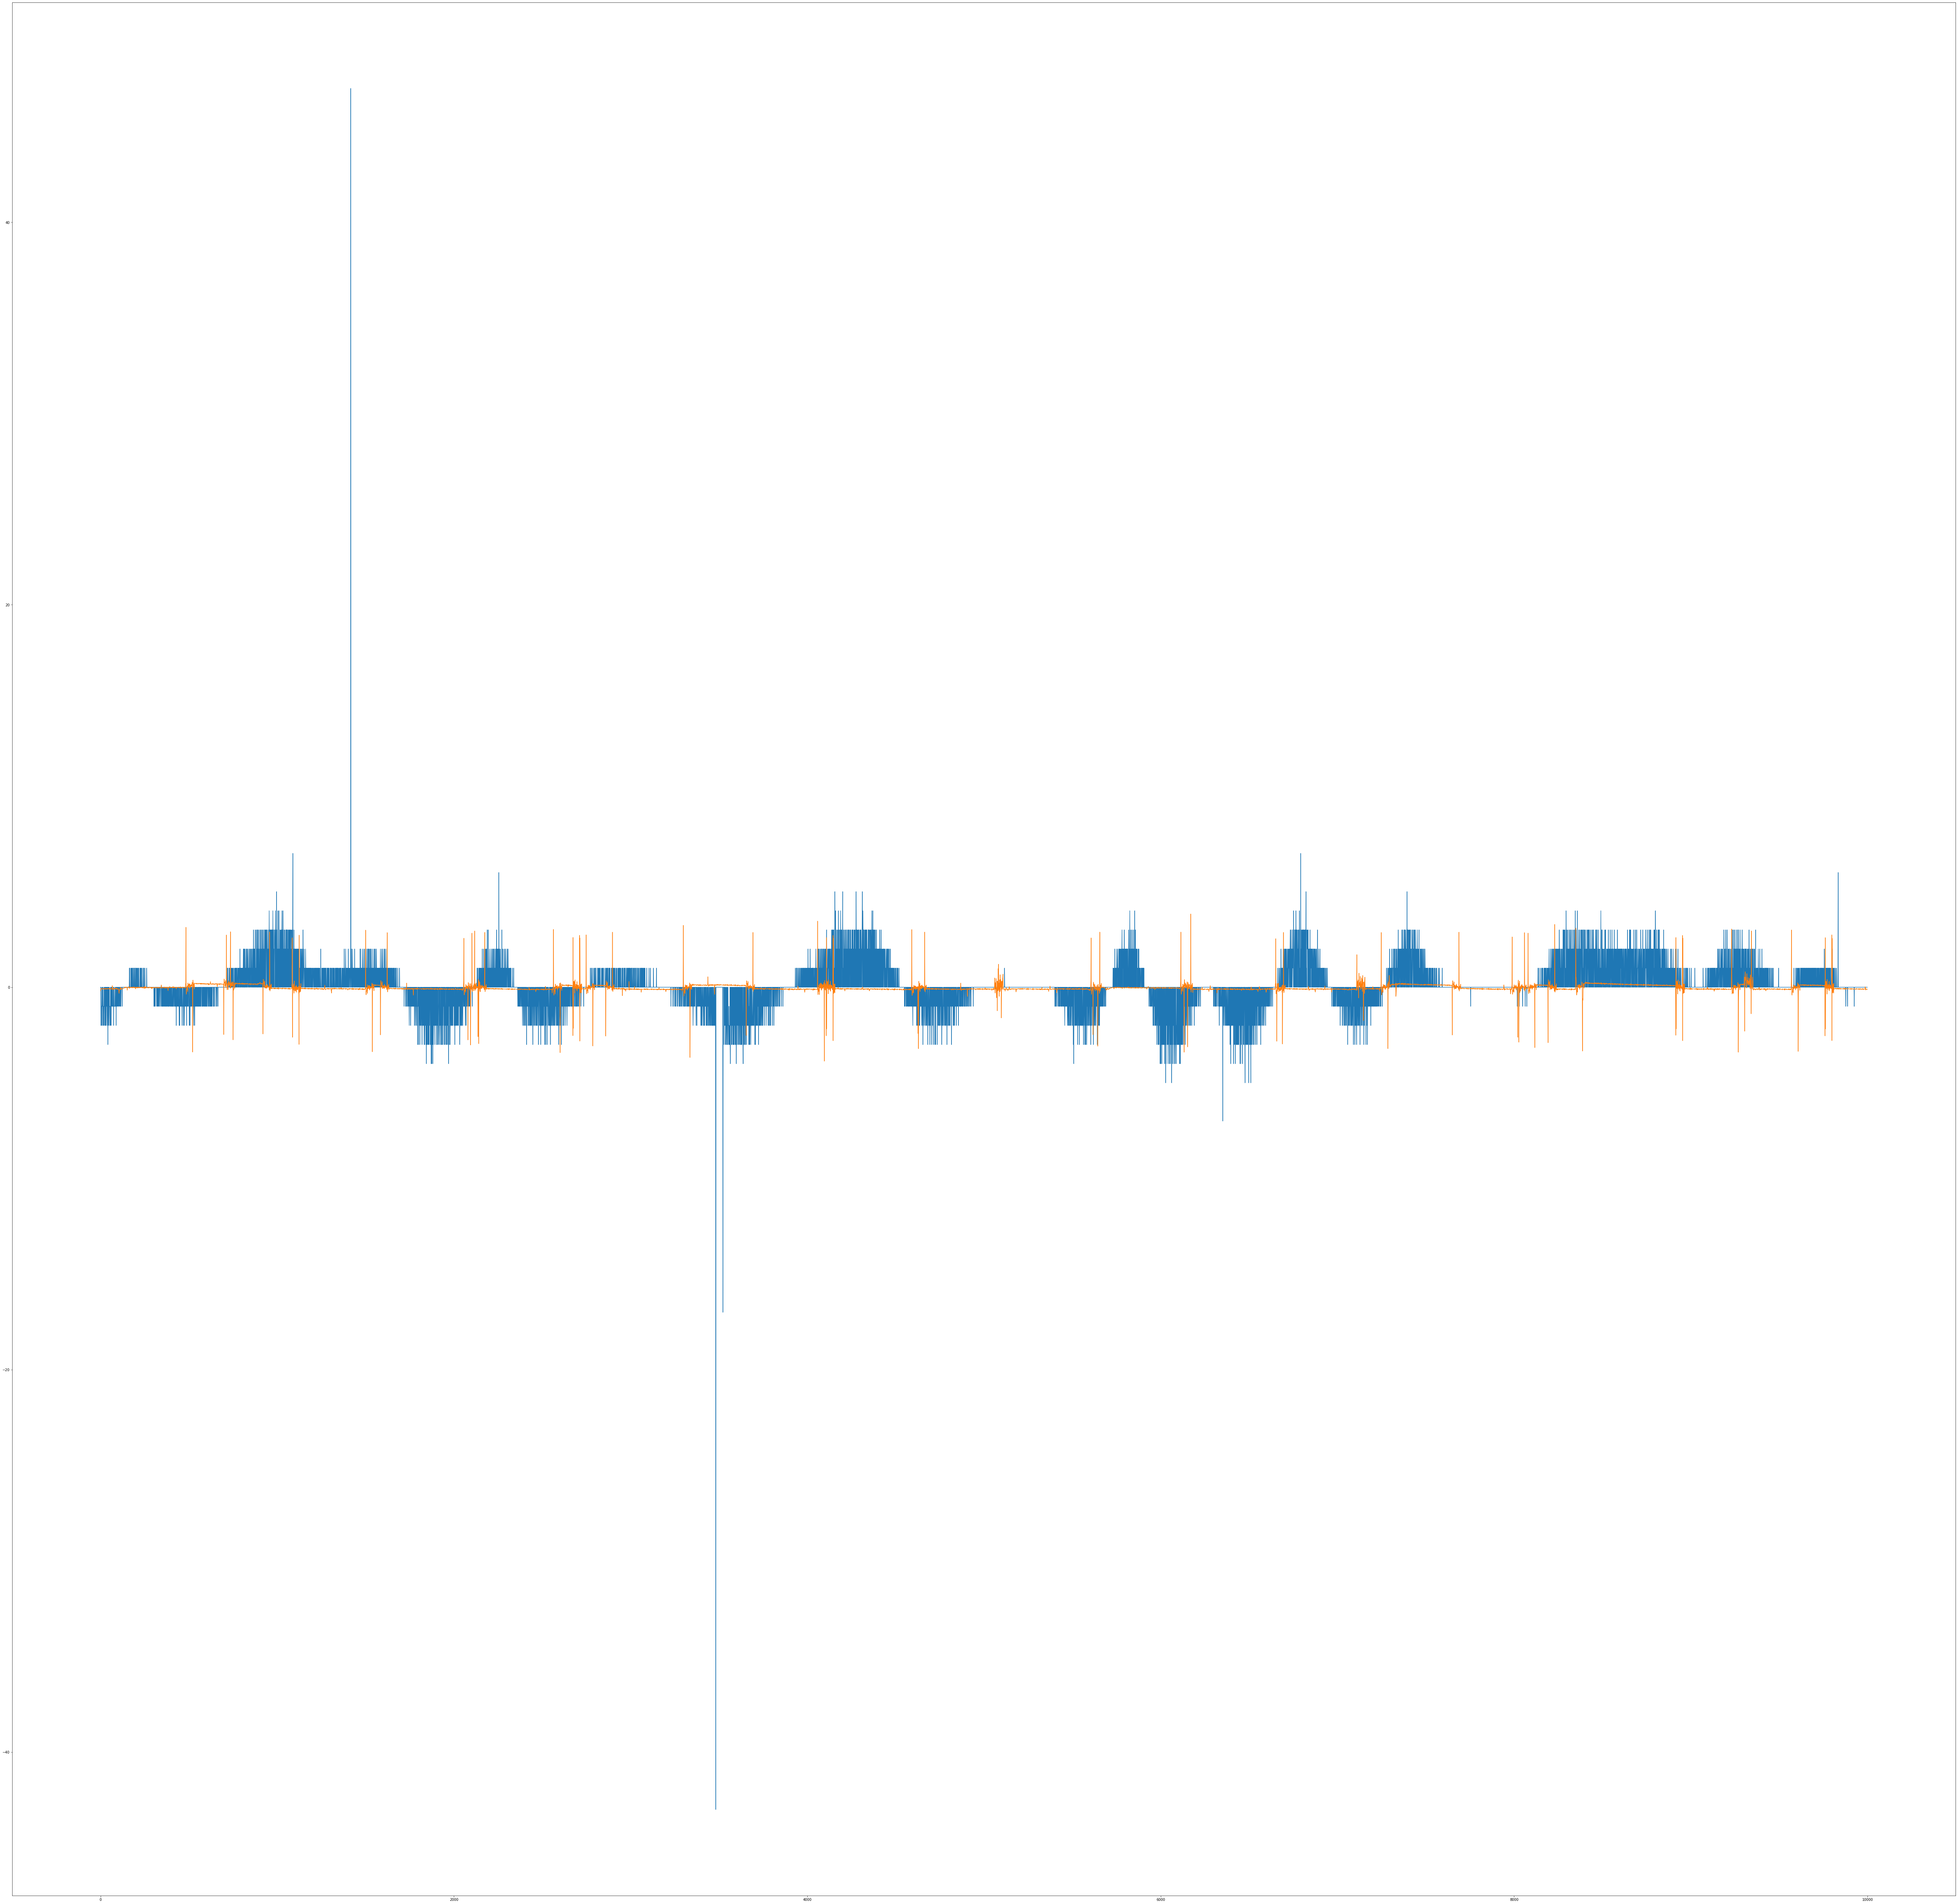

In [13]:
plt.figure(figsize=(100,100))
plt.plot(z[:10000]);
plt.plot(lr_y.predict(W)[:10000]);


In [14]:
with open('../pickled_models/linear_x.pkl', 'wb') as f:
    pickle.dump(lr_x, f)


with open('../pickled_models/linear_y.pkl', 'wb') as f:
    pickle.dump(lr_y, f)
